In [1]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]



In [3]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_toy = te.fit(toy_dataset).transform(toy_dataset)

df = pd.DataFrame(te_toy, columns=te.columns_)

df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [9]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Heels, Dress)"
9,0.4,"(Dress, Scarf)"


In [10]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
1,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
2,(Dress),(Scarf),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
3,(Scarf),(Dress),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2,1.000000
4,(Earrings),(Scarf),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
...,...,...,...,...,...,...,...,...,...,...
61,"(Pants, Hat)","(Skirt, Sneakers)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
62,(Skirt),"(Sneakers, Pants, Hat)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
63,(Sneakers),"(Skirt, Pants, Hat)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
64,(Pants),"(Skirt, Sneakers, Hat)",0.8,0.4,0.4,0.500000,1.250000,0.08,1.2,1.000000


## **Result Interpretation**

Overall, the results suggest strong relationships between the items, particularly between heels and dresses, as well as Pants, Hats, Skirts, and Sneakers.This can be leveraged for sales strategies or promotions. 

The high confidence and lift values indicate that customers who buy one are very likely to buy the other, making them ideal candidates for cross-selling or upselling initiatives.


In [15]:
# Reading new dataset
with open("Market_Basket_Optimisation.csv", 'r') as file:
    data = [line.strip().split(',') for line in file]

# Display the first five transactions
for transaction in data[:5]:
    print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [16]:
te = TransactionEncoder()
mbo = te.fit(data).transform(data)

df = pd.DataFrame(mbo, columns=te.columns_)

df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Applying the Apriori Algorithm to find Frequent Itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found
frequent_itemsets.head(20)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
5,0.033729,(brownies)
6,0.087188,(burgers)
7,0.030129,(butter)
8,0.081056,(cake)
9,0.015331,(carrots)


In [19]:
# Generating Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630,0.178411


In [27]:
# Filtering the rules by lift & confidence 
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.4)]

# Sort the rules by lift in descending order
top_rules = strong_rules.sort_values(by='lift', ascending=False)

# Display the top rules
top_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
384,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470,0.607262
343,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
377,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
320,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
364,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555
272,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
400,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
395,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514
388,"(spaghetti, milk)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879,0.479672
325,"(milk, chocolate)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,0.467922


C:\Users\Ummhabibi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ummhabibi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


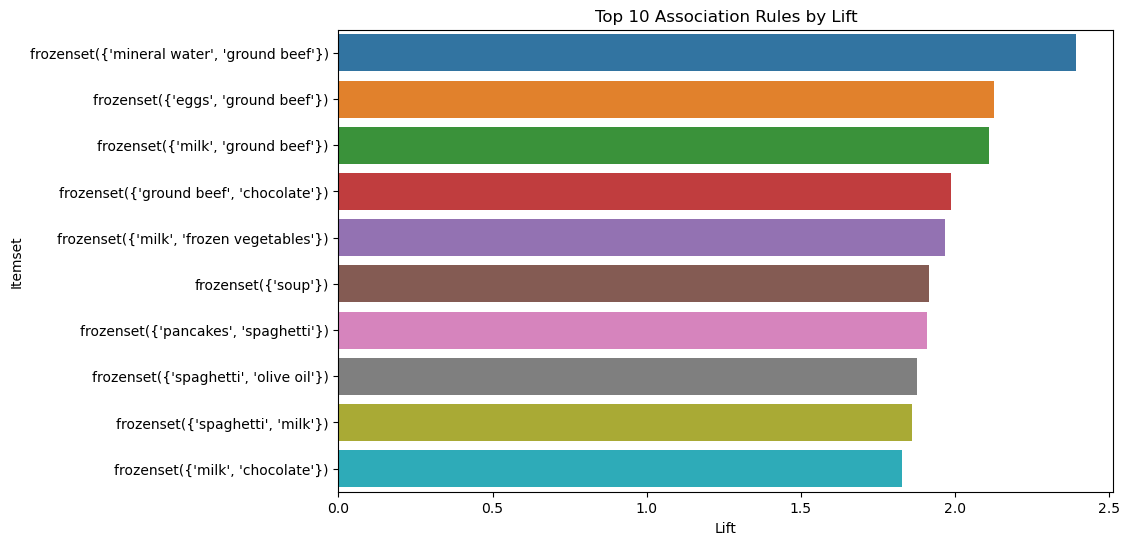

In [29]:
# Visualizing Results
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 rules based on lift
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['lift'].head(10), y=top_rules['antecedents'].head(10).astype(str))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Itemset')
plt.show()

## **INSIGHTS**

Strong Associations: Rules with high lift (e.g., mineral water and ground beef leading to spaghetti) suggest that promoting these products together could be beneficial for marketing strategies.

Shopping Behavior: The presence of multiple rules involving mineral water indicates it’s a central product in your dataset, likely a staple for many customers.

Confidence Levels: While confidence values are above 0.4, which is decent, further exploration might be needed to identify additional combinations that could enhance the effectiveness of cross-selling strategies.


## **BUSINESS PLAN**

Based on the Apriori algorithm results, aiming to enhance sales through targeted marketing strategies by leveraging identified customer purchase behavior. Below is a business plan that can be implemented by the  supermarket:

### **Business Plan for Supermarket**

1. **Market Analysis**:

Target Market: Local families, health-conscious individuals, and busy professionals.

Trends: Increasing demand for convenience foods and health products.

2. **Key Findings from Data Analysis**:

Strong associations exist between staple items (like mineral water and ground beef) and other products (e.g., spaghetti, frozen vegetables).

High confidence and lift metrics suggest effective cross-selling opportunities.

3. **Marketing Strategy**:

Bundle Promotions: Create promotional bundles that include frequently co-purchased items (e.g., mineral water, ground beef, spaghetti).

Loyalty Programs: Implement a loyalty program that rewards customers for purchasing frequently combined items, encouraging repeat purchases.

In-Store Displays: Use attractive displays for high-lift item combinations to increase visibility and encourage impulse buys.

4. **Product Placement**:

Position products identified in strong association rules close to each other in-store to facilitate easy access (e.g., place spaghetti near ground beef and mineral water).

Highlight top-performing combinations through signage to inform customers about great pairing options.

5. **In-Store Displays and Signage**:

Position related products together in-store and use eye-catching displays and signage to promote top-performing combinations.

6. **Customer Engagement and Loyalty Programs**:

Implement a loyalty program rewarding customers for purchasing item bundles, and engage them with recipe cards and cooking demonstrations.

7. **Monitor and Adjust**:

Track sales performance of promoted items, gather customer feedback, and refine strategies based on insights and trends to continuously improve the shopping experience.

### **Conclusion:**

Implementing a data-driven marketing strategy will enhance customer satisfaction and increase sales, creating a more profitable and engaging shopping experience.



## **Next Steps:**
Conduct a pilot test of the proposed promotions to gather data and feedback.
